In [1]:
import experiment_framework as ef
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [2]:
G = nx.barabasi_albert_graph(2000, 2)
model = ef.run_influence_cascade(G, num_influencers=20, steps=3, selection_method='random')

In [3]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1008
Number of deinfluenced nodes: 0
Number of susceptible nodes: 992
influencer {1152, 132, 1799, 395, 1935, 272, 1041, 21, 662, 1176, 537, 161, 294, 425, 682, 299, 1324, 1195, 688, 1717, 1083, 701, 1214, 575, 321, 1602, 324, 966, 1864, 586, 1355, 843, 596, 1246, 352, 97, 98, 1382, 1766, 1514, 1771, 1643, 369, 881, 1650, 1142, 1528, 1017, 1146, 1020}


In [4]:
# Run simulation for different values of k
budget_list = list(range(1, 201))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'High Degree': set(), 'Low Degree': set()}), (2, {'Random': {1257}, 'High Degree': {98}, 'Low Degree': {98}}), (3, {'Random': {1716}, 'High Degree': {47}, 'Low Degree': {98}}), (4, {'Random': {1289}, 'High Degree': {33}, 'Low Degree': {98, 103}}), (5, {'Random': {1738, 667}, 'High Degree': {16}, 'Low Degree': {98, 103}}), (6, {'Random': {1123, 335}, 'High Degree': {32}, 'Low Degree': {105, 98, 103}}), (7, {'Random': {153, 763}, 'High Degree': {20}, 'Low Degree': {105, 98, 103}}), (8, {'Random': {1916, 1833, 1532, 1909}, 'High Degree': {25}, 'Low Degree': {105, 98, 107, 103}}), (9, {'Random': {1545, 1699, 325, 214}, 'High Degree': {15}, 'Low Degree': {105, 98, 107, 103}}), (10, {'Random': {674, 1982, 422}, 'High Degree': {27}, 'Low Degree': {98, 103, 105, 107, 112}}), (11, {'Random': {648, 471}, 'High Degree': {41}, 'Low Degree': {98, 103, 105, 107, 112}}), (12, {'Random': {912, 1193, 997, 1958}, 'High Degree': {65}, 'Low Degree': {98, 130, 103, 105, 107, 112}}), 

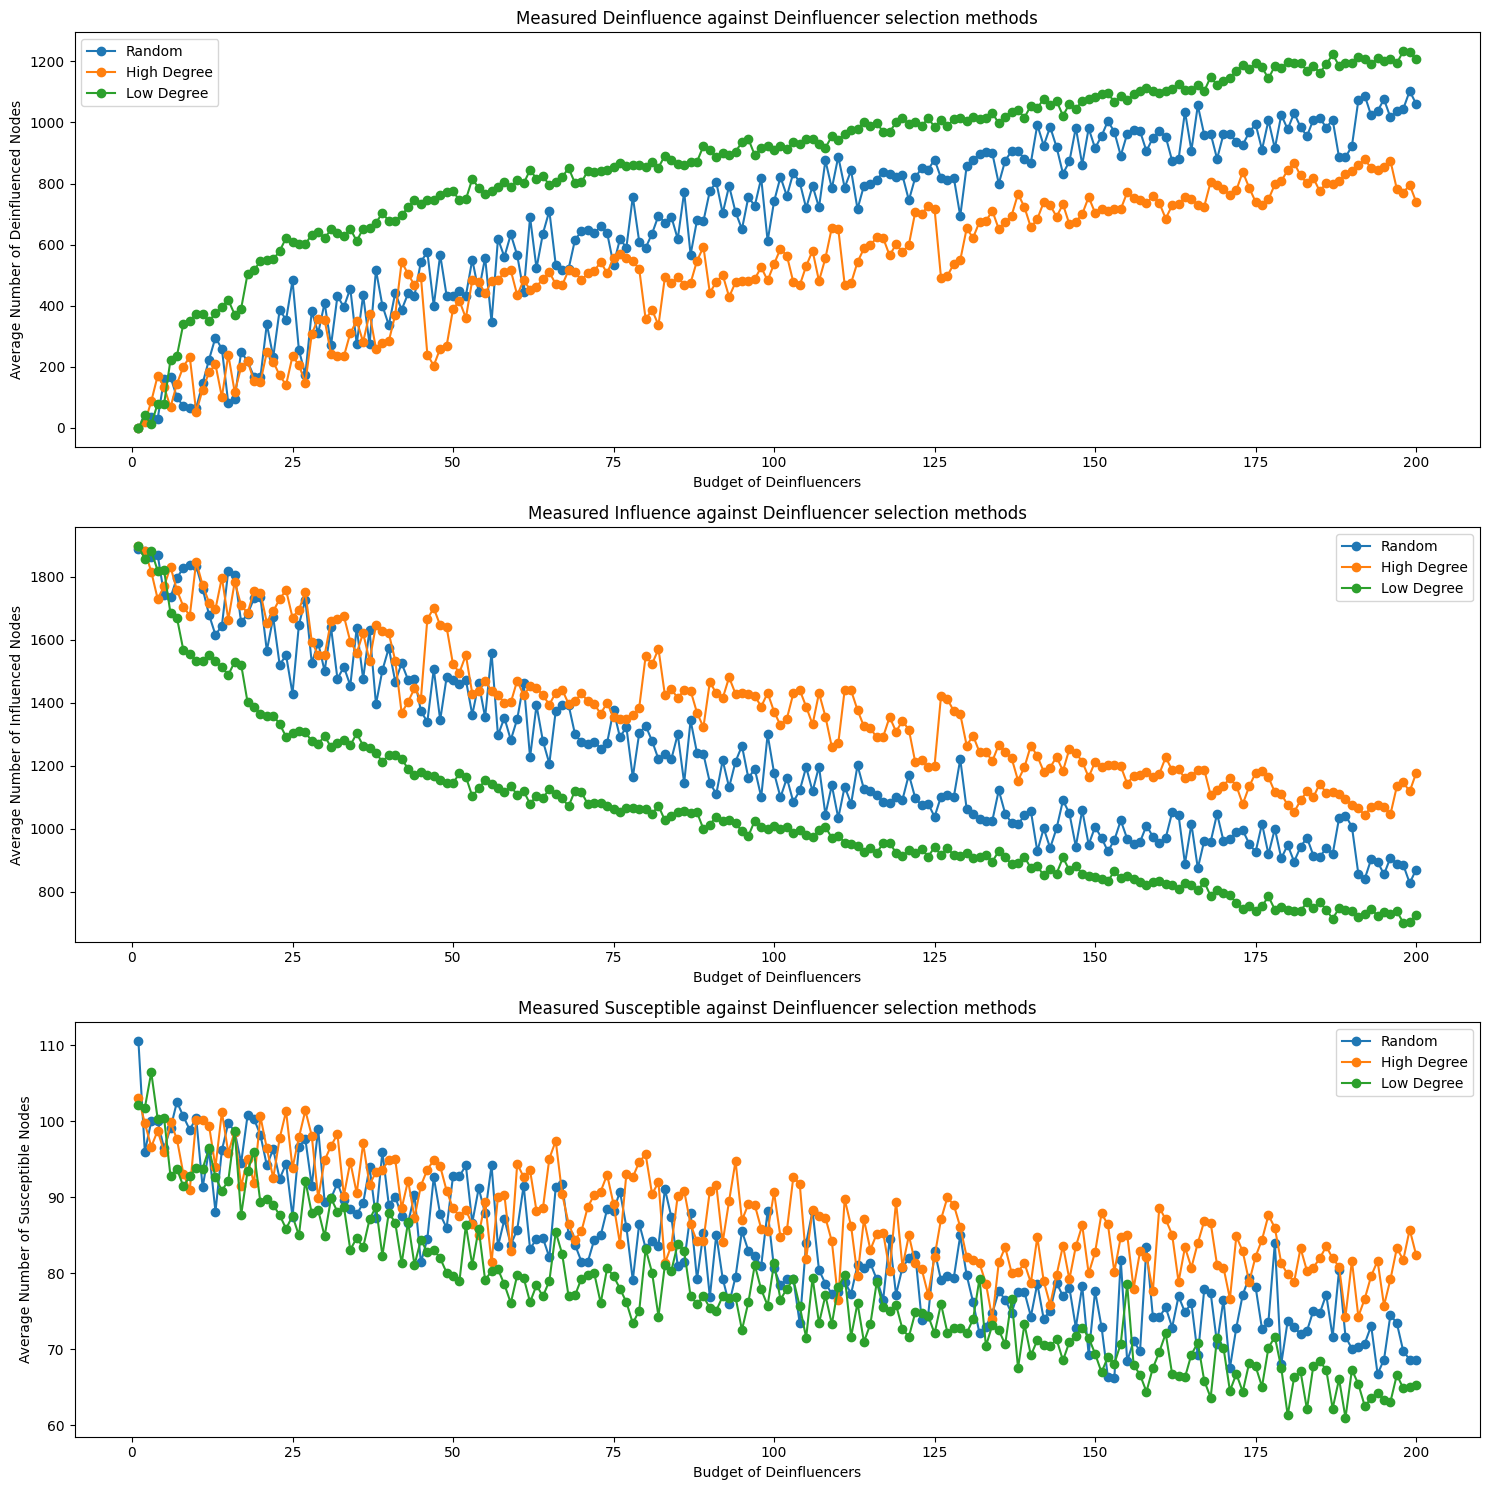

In [5]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [6]:
# Run simulation for different values of k
budget_list = list(range(1, 251))
deinfluencers_list = ef.select_deinfluencers_budget_naive(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'High Degree': set(), 'Low Degree': set()}), (2, {'Random': set(), 'High Degree': set(), 'Low Degree': {98}}), (3, {'Random': set(), 'High Degree': set(), 'Low Degree': {98}}), (4, {'Random': {343}, 'High Degree': set(), 'Low Degree': {98, 103}}), (5, {'Random': {204}, 'High Degree': set(), 'Low Degree': {98, 103}}), (6, {'Random': {334}, 'High Degree': set(), 'Low Degree': {105, 98, 103}}), (7, {'Random': {714, 466}, 'High Degree': set(), 'Low Degree': {105, 98, 103}}), (8, {'Random': {857}, 'High Degree': set(), 'Low Degree': {105, 98, 107, 103}}), (9, {'Random': {1819, 444, 1037}, 'High Degree': set(), 'Low Degree': {105, 98, 107, 103}}), (10, {'Random': {972, 1389, 1620}, 'High Degree': set(), 'Low Degree': {98, 103, 105, 107, 112}}), (11, {'Random': {993, 523, 1756}, 'High Degree': set(), 'Low Degree': {98, 103, 105, 107, 112}}), (12, {'Random': {1592, 1564, 1726, 687}, 'High Degree': set(), 'Low Degree': {98, 130, 103, 105, 107, 112}}), (13, {'Random': {141

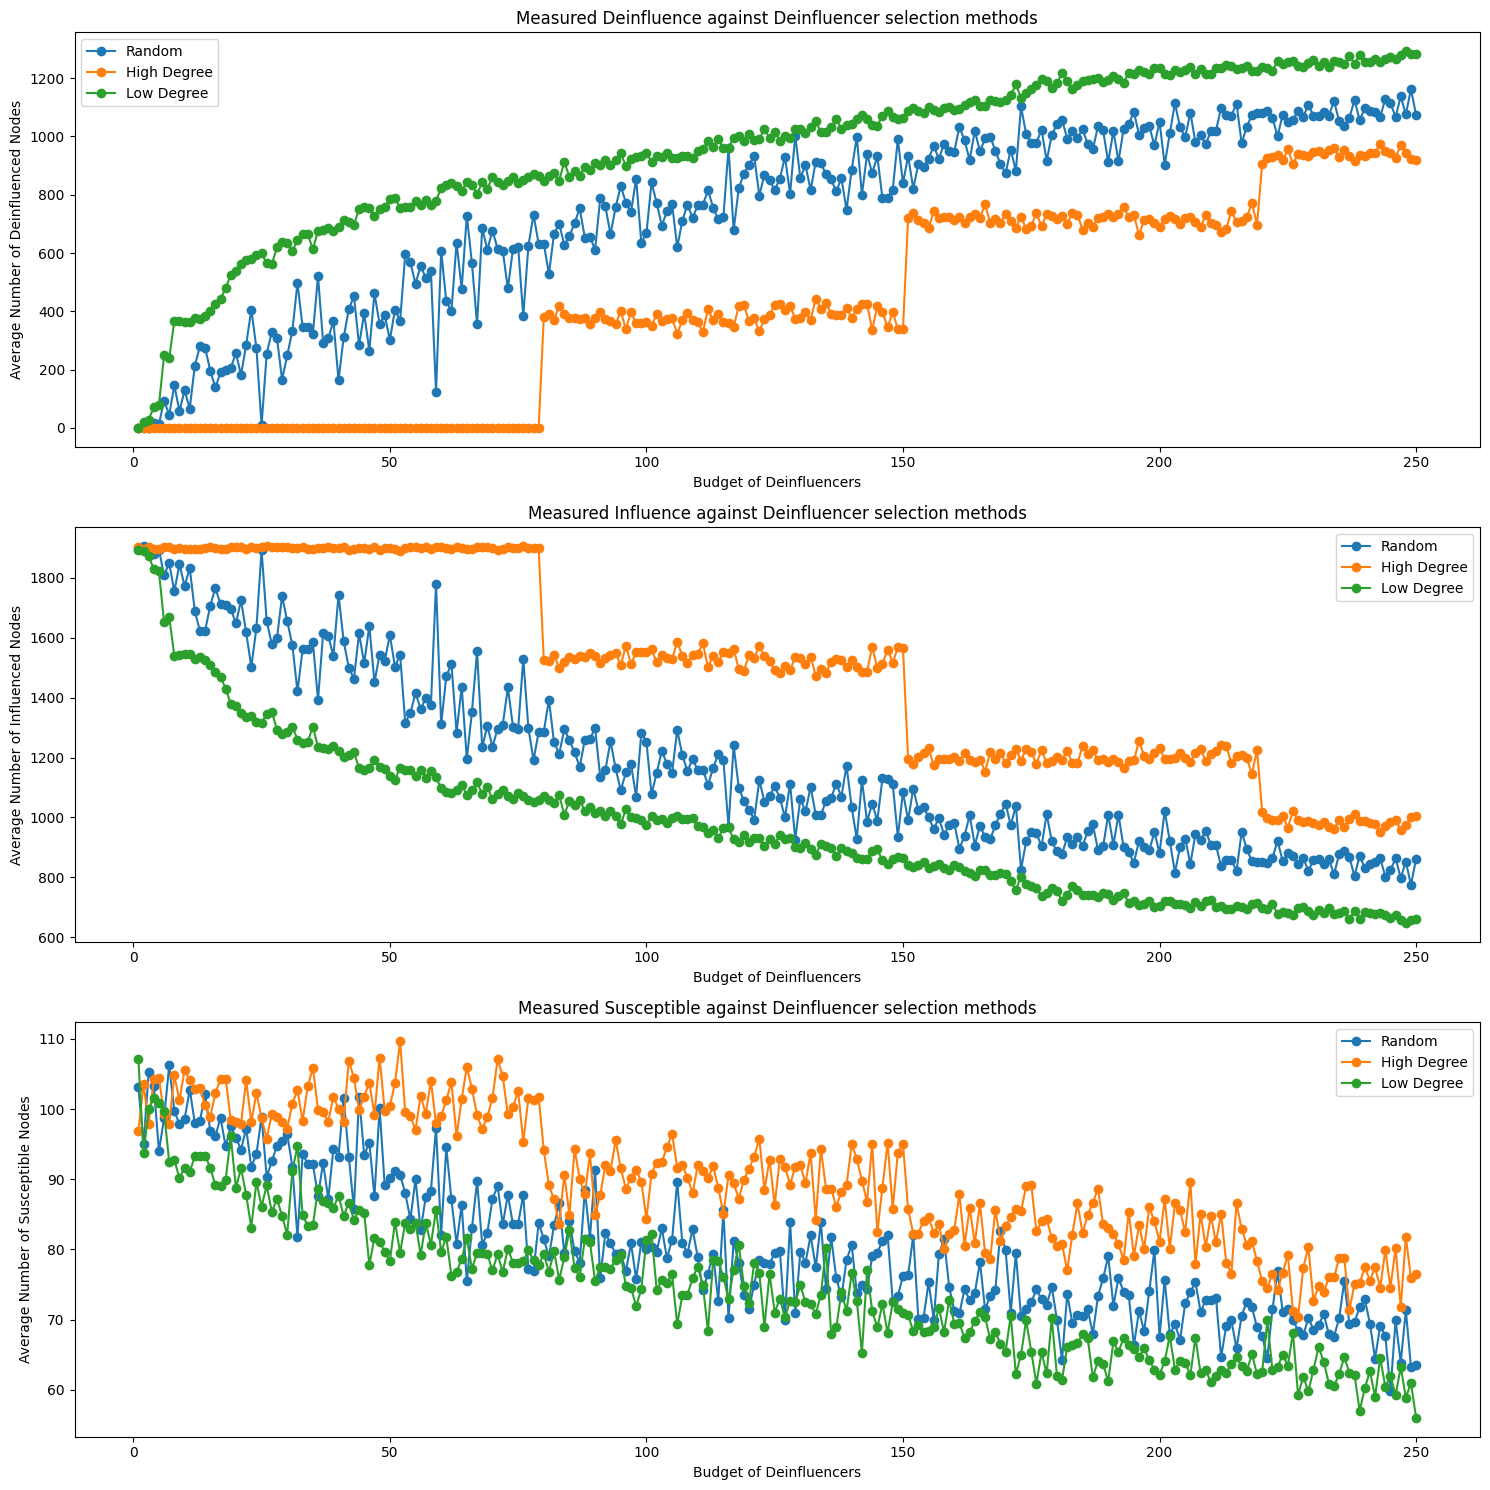

In [7]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()